Le modéle de **Nielson Siegel** vise à modéliser le taux zéro coupon :
$$R(0,T)=\beta_0+\beta_1\left(\dfrac{1-\exp(-T/\tau)}{T/\tau}\right)+\beta_2\left(\dfrac{1-\exp(-T/\tau)}{T/\tau}-\exp(-T/\tau)\right)$$

Le **taux zéro-coupon** sert à déterminer la **valeur présente d'un flux future**. Par exemple, la valeur présente d'un flux future payant un coupon de C euros dans l'année T vaut:
$$\dfrac{C}{{\left(1+R(0,T)\right)}^T}$$


In [3]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [123]:
from matplotlib.ticker import PercentFormatter

In [4]:
def NilsonSiegelFuncstion(t,beta0=0.01,beta1=0.02,beta2=0.04,tau= 2) :
    return beta0+beta1*((1-np.exp(-t/tau))/(t/tau))+beta2*((1-np.exp(-t/tau))/(t/tau)-np.exp(-t/tau))

Posons $S$ la fonction définit par :
$$S : T \longrightarrow T\times R(0,T) $$
Montrer que pour tout $T>0$ : 
$$S'(T)=\beta_0+\beta_1\times\exp(-T/\tau)+\beta_2 \times \dfrac{T}{\tau}\times\exp(-T/\tau)$$
Monter que pour $T \longrightarrow 0$ :
$$R(0,T)= \beta_0+\beta_1 +\left( \dfrac{\beta_2-\beta_1}{2}\right)\dfrac{T}{\tau}+\left( \dfrac{\beta_1}{6}-\dfrac{\beta_2}{3}\right){\left(\dfrac{T}{\tau}\right)}^2 + o(T^2)$$


In [163]:
def plotModel():
    fig,ax = plt.subplots(figsize=(6,4))
    ax.set_ylim([-0.1,0.1])
        
    x=np.arange(0+1/360,10,1/360)
    
    @widgets.interact(beta0=(-0.1,0.15,0.0005),beta1=(-0.1,1,0.0005),beta2=(-1,1,0.0005),tau=(-0.05,5,0.0005))
    def update(beta0=0.00,beta1=-0.05,beta2=0.31,tau=1.1) :
        [l.remove() for l in ax.lines]
        [l.remove() for l in ax.texts]
        ax.plot(x, NilsonSiegelFuncstion(x,beta0,beta1,beta2,tau), color='red',lw=0.4)
        ax.set_title(fr'$\beta_{0}=${beta0:.2%}, $\beta_{1}=${beta1:.2%}, $\beta_{2}=${beta2:.2f}, $\tau=${tau:.1f}',fontsize=8)
        ax.axhline(beta0+beta1, color='black', lw=0.5,ls='--',label = 'oo')
        ax.axhline(beta0, color='blue', lw=0.5,ls='--',label = 'o0o')
        ax.text(-0.1,beta0+0.0008,fr'Limit = $\beta_{0}$',color = 'blue',fontsize=8)
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        ax.yaxis.set_tick_params(labelsize=7)
        ax.xaxis.set_tick_params(labelsize=7)
        

interactive(children=(FloatSlider(value=0.0, description='beta0', max=0.15, min=-0.1, step=0.0005), FloatSlide…

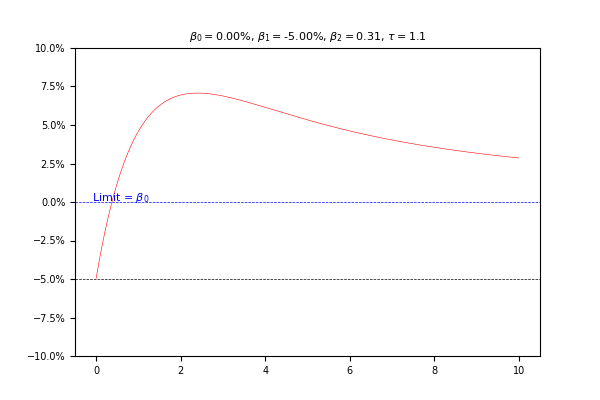

In [164]:
plotModel()

On souhaite à améliorer la méthode de Nielson Siegel. En effet, cette dernière ne permet pas de reproduire des creux ou des bosses dans la courbe des taux zéro-coupon.

Pour y remédier, l'industrie propose la méthode de Nilson Siegel augmenté. Elle revient à ajouter un terme sous la forme $$\beta_3\left(\dfrac{1-\exp(-T/\tau_2)}{T/\tau_2}-\exp(-T/\tau_2)\right)$$
Ce qui donne, pour $T>0$ :
$$R(0,T)=\beta_0+\beta_1\left(\dfrac{1-\exp(-T/\tau_1)}{T/\tau_1}\right)+\beta_2\left(\dfrac{1-\exp(-T/\tau_1)}{T/\tau_1}-\exp(-T/\tau_1)\right)+\beta_3\left(\dfrac{1-\exp(-T/\tau_2)}{T/\tau_2}-\exp(-T/\tau_2)\right)$$

In [150]:
def NilsonSiegelUpFuncstion(t,beta0,beta1,beta2,beta3,tau1,tau2):
    return NilsonSiegelFuncstion(t,beta0,beta1,beta2,tau1)+beta3*((1-np.exp(-t/tau2))/(t/tau2)-np.exp(-t/tau2))

In [161]:
def plotModelUp():
    fig,ax = plt.subplots(figsize=(6,4))
    ax.set_ylim([-0.1,0.1])
        
    x=np.arange(0+1/360,10,1/360)
    
    @widgets.interact(beta0=(-0.1,0.15,0.0005),beta1=(-0.1,1,0.0005),beta2=(-1,1,0.0005),beta3=(-1,1,0.0005),tau1=(-0.05,5,0.0005),tau2=(-0.05,5,0.0005))
    def update(beta0=-0.04,beta1=0.06,beta2=0.34,beta3 = -0.38,tau1=1.79,tau2=0.9) :
        [l.remove() for l in ax.lines]
        [l.remove() for l in ax.texts]
        ax.plot(x, NilsonSiegelUpFuncstion(x,beta0,beta1,beta2,beta3,tau1,tau2), color='red',lw=0.4)
        ax.set_title(fr'$\beta_{0}=${beta0:.2%}, $\beta_{1}=${beta1:.2%}, $\beta_{2}=${beta2:.2f},$\beta_{2}=${beta3:.2f}, $\tau_1=${tau1:.1f},$\tau_2=${tau2:.1f}',fontsize=8)
        ax.axhline(beta0+beta1, color='black', lw=0.5,ls='--',label = 'oo')
        ax.axhline(beta0, color='blue', lw=0.5,ls='--',label = 'o0o')
        ax.text(-0.1,beta0+0.0008,fr'Limit = $\beta_{0}$',color = 'blue',fontsize=8)
        ax.yaxis.set_major_formatter(PercentFormatter(1))
        ax.yaxis.set_tick_params(labelsize=7)
        ax.xaxis.set_tick_params(labelsize=7)

Calculer dans ce cas la dérivée de la fonction $ S : T \longrightarrow T\times R(0,T)$.

Est-il possible de reproduire des creux dans la courbe de taux zero-coupon avec ce modéle augmenté ? Quid des bosses ?

interactive(children=(FloatSlider(value=-0.04, description='beta0', max=0.15, min=-0.1, step=0.0005), FloatSli…

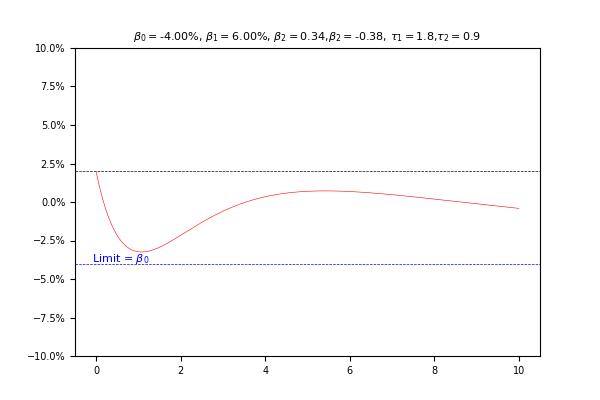

In [162]:
plotModelUp()